# 一、初始化环境

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import random
from pandas import read_csv as pdreadcsv

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot') 

# 二、模拟数据展示

In [3]:
# 展示一下如何使用plot绘图。这里是自己创造模拟数据。
# 构建3个不同振幅和波长的数据（其中一个是直线）。
def get_draw():
    x = np.linspace(0, 50, 100)
    ts1 = pd.Series(3.1 * np.sin(x / 1.5) + 3.5)
    ts2 = pd.Series(2.2 * np.sin(x / 3.5 + 2.4) + 3.2)
    ts3 = pd.Series(0.04 * x + 3.0)
    ts1.plot()
    ts2.plot()
    ts3.plot()
    plt.ylim(-2, 10)
    plt.legend(['ts1', 'ts2', 'ts3'])
    plt.show()

# 计算欧拉距离
    def euclid_dist(t1, t2):
        return math.sqrt(sum((t1 - t2)**2))

    print("ts1和ts2的欧拉距离：%f" %euclid_dist(ts1, ts2))  # 26.959216
    print("ts1和ts3的欧拉距离：%f" %euclid_dist(ts1, ts3))  # 23.189249
    print("ts2和ts3的欧拉距离：%f" %euclid_dist(ts2, ts3))  # 17.298735

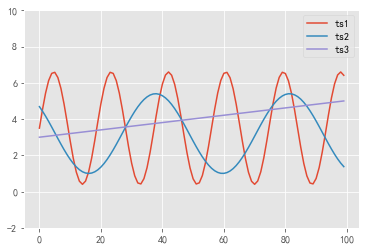

ts1和ts2的欧拉距离：26.959216
ts1和ts3的欧拉距离：23.189249
ts2和ts3的欧拉距离：17.298735


In [4]:
get_draw()

# 三、真实数据

## 1、数据提取

In [5]:
def get_wbcdata(filename):
    df = pdreadcsv(filename)
    workdata = df[["num", "days", "wbc"]]

    workdata_len = len(workdata["num"])

    days = [0] * (workdata_len)
    WBC = [0] * (workdata_len)
    Numb = [0] * (workdata_len)

    for i in range(workdata_len):
        Numb[i] = workdata["num"][i]
        days[i] = workdata["days"][i]
        WBC[i] = workdata["wbc"][i]
    s = int(len(WBC) / 30)

    WBCData = np.mat(WBC).reshape(s, 30)
    WBCData = np.array(WBCData)

    return WBCData, Numb, days, WBC
    # print(WBCData)

In [6]:
filename = r"../data/20200315.csv"
WBCData, Numb, days, WBC = get_wbcdata(filename)

In [7]:
# 白细胞计数分组数据
WBCData

array([[4.13, 3.65, 3.16, ..., 4.13, 4.13, 4.13],
       [4.43, 4.45, 4.47, ..., 4.43, 4.43, 4.43],
       [5.74, 5.52, 5.29, ..., 5.74, 5.74, 5.74],
       ...,
       [4.43, 4.52, 4.6 , ..., 4.43, 4.43, 4.43],
       [3.55, 3.55, 3.55, ..., 1.77, 2.24, 2.14],
       [6.21, 6.61, 7.02, ..., 6.21, 6.21, 6.21]])

In [8]:
len(WBCData) # 共43个患者

43

In [9]:
print(type(Numb))
print(len(Numb))  # 共1290条记录。

<class 'list'>
1290


In [10]:
# 所以每个患者共30条记录，也就是每天测白细胞技术，连续测30天。
len(WBCData[0])

30

In [11]:
# Numb是患者编号
Numb[:10]

[6774, 6774, 6774, 6774, 6774, 6774, 6774, 6774, 6774, 6774]

In [12]:
# 时间序号，全部是是从1到30。
days[:60:3]

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28]

In [13]:
# 1290条白细胞计数结果列表
len(WBC)

1290

## 2、绘制白细胞计数结果的时序图

In [22]:
def draw_wbcdata(filename):
    WBCData, _, _, _ = get_wbcdata(filename)

    for every_wbcdata in WBCData:
        plt.plot(every_wbcdata)
        plt.legend(['WBC'])
    plt.show()

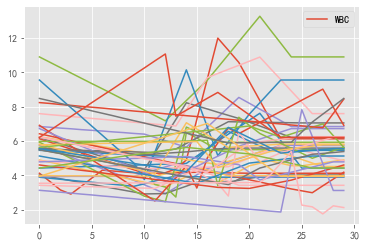

In [15]:
draw_wbcdata(filename)

## 3、定义相似距离

### DTW距离

In [16]:
# DTW距离，时间复杂度为两个时间序列长度相乘
def DTWDistance(s1, s2):
    DTW = {}
    s1_len = len(s1)
    s2_len = len(s2)

    
# 先把路径矩阵设置为原始值，null。
    for i in range(s1_len):
        DTW[(i, -1)] = float('inf')

    for i in range(s2_len):
        DTW[(-1, i)] = float('inf')

    DTW[(-1, -1)] = 0

    
# 计算DTW距离
    for i in range(s1_len):
        for j in range(s2_len):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)],
                                     DTW[(i - 1, j - 1)])

    return math.sqrt(DTW[len(s1) - 1, len(s2) - 1])

In [17]:
for i in range(42):
    print(DTWDistance(WBCData[i], WBCData[i+1]))

7.342240802370898
5.392355700433717
6.0862632213863375
2.7587134682674086
4.213241032744269
9.60509760491792
18.969301515870324
18.099455792923717
17.013897260768914
3.1652961946712033
7.3719264782009315
27.167025968994103
10.641809056734669
20.903906333506185
18.846763647905178
22.00403372111578
12.653793897483869
12.654631563186657
8.845970834227295
4.63326019126921
9.152578871553088
8.2858011079195
4.6924194185942065
4.604704116444401
3.0147802573322005
3.2875674898015412
3.6629359808765427
5.72729430010367
1.610217376629626
1.0540398474441077
1.6183324751113415
2.723215011709505
3.379807686836635
3.741082730975085
10.699499988317209
12.978509159375742
11.29591076452005
23.149043176770824
13.445084603675797
3.0016662039607263
6.737180419136776
21.77178219622822


上面只是相邻的患者数据进行了计算DTW距离，实际上是需要两两取数来计算，那就是 $\mathrm{C}_{43}^2 = \frac {43!}{2! \times (43-2)! } = \frac {43 \times 42}{2} = 903 $ 次，$O(n^2)$ 级复杂度。

### DTW_W距离

In [18]:
# DTW_W距离, 优化后的算法，只检测前W个窗口的值。
def DTWDistance_W(s1, s2, w):
    DTW = {}
    s1_len = len(s1)
    s2_len = len(s2)
    w = max(w, abs(s1_len - s2_len))

# 和DTW函数里不同，另一种初始化路径矩阵的循环方法。
    for i in range(-1, s1_len):
        for j in range(-1, s2_len):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(s1_len):
        for j in range(max(0, i - w), min(s2_len, i + w)):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)],
                                     DTW[(i - 1, j - 1)])
    return math.sqrt(DTW[s1_len - 1, s2_len - 1])

In [23]:
for i in range(42):
    # 第三个位置的参数，可以设置从2到30，越接近30，计算结果越接近 DTWDistance()。
    print(DTWDistance_W(WBCData[i], WBCData[i+1], 20))  

7.342240802370898
5.392355700433717
6.0862632213863375
2.7587134682674086
4.213241032744269
9.60509760491792
18.969301515870324
18.099455792923717
17.013897260768914
3.1652961946712033
7.3719264782009315
27.167025968994103
10.641809056734669
20.942886620521058
18.846763647905178
22.00403372111578
12.653793897483869
12.654631563186657
8.845970834227295
4.63326019126921
9.152578871553088
8.2858011079195
4.6924194185942065
4.604704116444401
3.0147802573322005
3.2875674898015412
3.6629359808765427
5.72729430010367
1.610217376629626
1.0540398474441077
1.6183324751113415
2.723215011709505
3.379807686836635
3.741082730975085
10.70584419838062
12.978509159375742
11.29591076452005
23.149043176770824
13.445084603675797
3.0016662039607263
6.7889910885197065
21.849725398732133


### LB_Keogh方法

In [20]:
def LB_Keogh(s1, s2, r):
    LB_sum = 0
    for ind, i in enumerate(s1):
        # 找出下界
        lower_bound = min(s2[(ind - r if ind - r >= 0 else 0):(ind + r)])
        # 找出上界
        upper_bound = max(s2[(ind - r if ind - r >= 0 else 0):(ind + r)])
        if i >= upper_bound:  # 在上界之上，减去上界
            LB_sum = LB_sum + (i - upper_bound)**2
        elif i < lower_bound: # 在下界
            LB_sum = LB_sum + (i - lower_bound)**2
    return math.sqrt(LB_sum)

In [24]:
for i in range(42):
    print(LB_Keogh(WBCData[i], WBCData[i+1], 2)) 

5.677657967859635
5.6532645436066415
6.497030090741461
2.765592160821981
4.565183457430819
9.259433027999068
14.571194185789986
18.11362746663406
15.552793961214812
4.160108171670539
8.364986551094988
24.506315512536766
9.809113109756662
21.521754110666723
17.459029182632122
21.88255469546461
12.058042958954823
12.38466794064338
7.6189894343016356
5.8201632279516025
6.913197523577638
9.196869032447944
3.9035368577739846
4.687461999845972
1.4308389147629452
4.381905977996334
3.4566891673970352
7.671231974070396
3.3827799218985555
3.7793650260328127
2.962262648719724
5.510571658185746
4.604291476438042
5.277925728920406
11.431666545171792
11.921048611594536
13.277469638451446
22.100459271245924
12.68531828532497
3.2523991144999407
8.343626309944616
21.73032673477323
